In [1]:
import sys
import os
import numpy as np
from math import *
import h5py
sys.path.append(os.path.join(os.path.dirname("__file__"), "/home/henhans/WIEN_GUTZ/bin/tools/Gutzwiller"))
from dataproc import get_csr_matrix
from my_impurity_analysis import *
np.set_printoptions(precision=5, suppress=True)
from get_dos import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
golden_mean = (sqrt(5)+1.0)/2.0         # Aesthetic ratio

#tp = 2.0
#U_list = np.arange(0.2,10.6,0.2)
tp_list = np.arange(0.01,2.05,0.01)

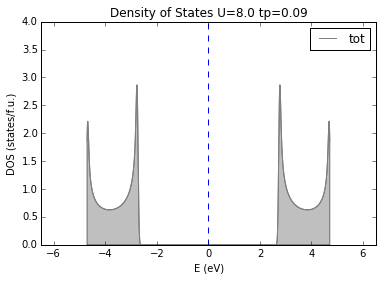

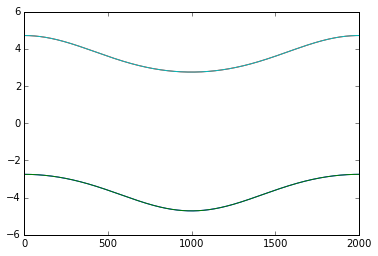

E_tot= -0.127648095697
error= 2.57257970482e-08
E_F= 3.99999582792
ntot= (1.99999999948+2.50366879555e-51j)
R=
[[ 0.46984-0.48564j -0.48603-0.47194j  0.00000+0.j       0.00000+0.j     ]
 [ 0.18572+0.01318j  0.00809-0.17957j  0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j       0.46984-0.48564j -0.48603-0.47194j]
 [ 0.00000+0.j       0.00000+0.j       0.18572+0.01318j  0.00809-0.17957j]]
Z=
[[ 0.49126+0.j      -0.00002-0.49123j  0.00000+0.j       0.00000+0.j     ]
 [-0.00002+0.49123j  0.49126+0.j       0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j       0.49126+0.j      -0.00002-0.49123j]
 [ 0.00000+0.j       0.00000+0.j      -0.00002+0.49123j  0.49126+0.j     ]]
Lambda=
[[ 2.92835+0.j       3.39897-0.50581j  0.00000+0.j       0.00000+0.j     ]
 [ 3.39897+0.50581j  5.07164+0.j       0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j       2.92835+0.j       3.39897-0.50581j]
 [ 0.00000+0.j       0.00000+0.j       3.39897+0.50

In [3]:
U=8.0
tp=0.09
filename = "glogbandU"+str(U)+"tp"+str(tp)+".h5"
get_dos(filename,U,tp,True)

f = h5py.File(filename,'r')
kps = np.linspace(-pi,pi,1000)
bnd_ek = f["/BND_EK"][0]
EF = f["/E_FERMI"][0]
#print bnd_ek
plt.plot(bnd_ek-EF)
plt.show()

print "E_tot=", f["/E_TB_TOT"][0]

print "error=",f["/GA_MAX_ERR"][0]
print "E_F=",EF
print "ntot=",get_n11_dimer_bilayer(filename) + get_n22_dimer_bilayer(filename)
R = f["Impurity_1/GA_R"][...].T
print "R="
print R
Z = np.dot(np.conj(R).T,R)

print "Z="
print Z

print "Lambda="
lam = f["Impurity_1/GA_La"][...]
print lam

print "n11=",get_n11_dimer_bilayer(filename)
print "n22=",get_n22_dimer_bilayer(filename)
print "n1up=",get_n1up_dimer_bilayer(filename)
print "n1dn=",get_n1dn_dimer_bilayer(filename)
print "n2up=",get_n2up_dimer_bilayer(filename)
print "n2dn=",get_n2dn_dimer_bilayer(filename)

#print "D="
#print f["Impurity_1/GA_D"][...]
#print "Lambda_c="
#print f["Impurity_1/GA_Lc"][...]

f.close()

In [29]:
from scipy import *

print "Lambda eigenvalues="
print eigvals(lam[:,:])
u = eigh(lam[:,:])[1]

print "Lambda diagonalize="
print np.dot( np.conj(u).T, np.dot( lam, u ) )

print "Transformed R="
print np.dot( np.conj(u).T, R )

print "u="
print u

print np.dot( np.conj(np.dot( np.conj(u).T, R )).T, np.dot( np.conj(u).T, R ) )

Lambda eigenvalues=
[-0.67492+0.j  8.67492-0.j -0.67492+0.j  8.67492-0.j]
Lambda diagonalize=
[[-0.67492+0.j  0.00000+0.j  0.00000+0.j  0.00000-0.j]
 [ 0.00000+0.j -0.67492+0.j  0.00000-0.j  0.00000+0.j]
 [ 0.00000+0.j  0.00000+0.j  8.67492+0.j  0.00000+0.j]
 [ 0.00000+0.j  0.00000+0.j  0.00000+0.j  8.67492+0.j]]
Transformed R=
[[-0.38001+0.36317j  0.47955+0.0178j   0.00000+0.j       0.00000+0.j     ]
 [ 0.00000+0.j       0.00000+0.j      -0.38001+0.36317j  0.47955+0.0178j ]
 [ 0.00000+0.j       0.00000+0.j      -0.28622+0.42309j  0.16685+0.52831j]
 [-0.28622+0.42309j  0.16685+0.52831j  0.00000+0.j       0.00000+0.j     ]]
u=
[[-0.80578+0.j      -0.00000+0.j       0.00000+0.j      -0.59222+0.j     ]
 [ 0.59038+0.04672j -0.00000+0.j       0.00000+0.j      -0.80326-0.06356j]
 [-0.00000+0.j      -0.80578+0.j      -0.59222+0.j       0.00000+0.j     ]
 [-0.00000+0.j       0.59038+0.04672j -0.80326-0.06356j  0.00000+0.j     ]]
[[ 0.53724+0.j       0.00000-0.40273j  0.00000+0.j       0.00000+

In [51]:
# Calculating and print density matrix
from scipy.sparse import csr_matrix
from dataproc import get_csr_matrix, get_ed_lowest_vec, trace_single_state

filename = "glogbandU"+str(U)+"tp"+str(tp)+".h5"
f = h5py.File(filename, 'r')

rho = get_csr_matrix(f, "/Impurity_1/RHO")
density_matrix = zeros((4,4),dtype=complex)
for i in range(4):
    for j in range(4):
        ci = get_csr_matrix(f, "/Impurity_1/annihi.op._" + str(i+1))
        cj = get_csr_matrix(f, "/Impurity_1/annihi.op._" + str(j+1))
        ci_dagger_cj = ci.getH() * cj
        density_matrix[i,j] = np.sum((rho * ci_dagger_cj).diagonal())
print density_matrix

[[ 0.50000-0.j -0.20731+0.j -0.00000+0.j  0.00000-0.j]
 [-0.20731-0.j  0.50000-0.j -0.00000+0.j  0.00000-0.j]
 [-0.00000-0.j -0.00000-0.j  0.50000-0.j -0.20731+0.j]
 [ 0.00000+0.j  0.00000+0.j -0.20731-0.j  0.50000-0.j]]


In [19]:
Em_tot_list = []
Eb_tot_list = []
Ei_tot_list = []
Eeo_tot_list = []
Zm_list = []
Zb_list = []
Zi_list = []
Zeo_list = []
Dm_list = []
Db_list = []
Di_list = []
Deo_list = []

for tp in tp_list:
    fmname = "glogU"+str(U)+"tp"+str(tp)+".h5"
    fbname = "glogbandU"+str(U)+"tp"+str(tp)+".h5"
    finame = "glogMottU"+str(U)+"tp"+str(tp)+".h5"
    #feoname = "glogeoU"+str(U)+"tp"+str(tp)+".h5"
    #print fmname, finame
    fm = h5py.File(fmname, 'r')
    fb = h5py.File(fbname, 'r')
    fi = h5py.File(finame, 'r')
    #feo = h5py.File(feoname, 'r')
    
    Em_tot_list.append(fm["/E_TB_TOT"][0])# + fm["/E_GAMMA"][0] + fm["/E_POT2_U"][0])
    Eb_tot_list.append(fb["/E_TB_TOT"][0])# + fb["/E_GAMMA"][0] + fb["/E_POT2_U"][0])
    Ei_tot_list.append(fi["/E_TB_TOT"][0])# + fi["/E_GAMMA"][0] + fi["/E_POT2_U"][0])
    #Eeo_tot_list.append(feo["/E_TB_TOT"][0])# + feo["/E_GAMMA"][0] + feo["/E_POT2_U"][0])
    
    Rm = fm["/Impurity_1/GA_R"][...].T; Zm = np.dot(np.conj(Rm).T,Rm)
    Rb = fb["/Impurity_1/GA_R"][...].T; Zb = np.dot(np.conj(Rb).T,Rb)
    Ri = fi["/Impurity_1/GA_R"][...].T; Zi = np.dot(np.conj(Ri).T,Ri)
    #Reo = feo["/Impurity_1/GA_R"][...].T; Zeo = np.dot(np.conj(Reo).T,Reo)
    Zm_list.append(Zm[2,2].real)
    Zb_list.append(Zb[2,2].real)
    Zi_list.append(Zi[2,2].real)
    #Zeo_list.append(Zeo[2,2].real)
    Dm_list.append(get_d11_dimer_bilayer(fmname))
    Db_list.append(get_d11_dimer_bilayer(fbname))
    Di_list.append(get_d11_dimer_bilayer(finame))
    #Deo_list.append(get_d11_dimer_bilayer(feoname))
    
    #print 'U=',U
    #print Zm
    fm.close()
    fb.close()
    fi.close()

In [21]:
#from pylab import *
#import matplotlib.pyplot as plt
#import matplotlib
#%matplotlib inline
#golden_mean = (sqrt(5)+1.0)/2.0         # Aesthetic ratio


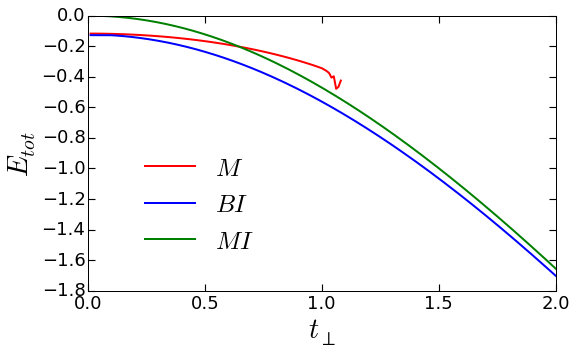

In [21]:
# Ploting Etot
fig = plt.figure(figsize=(5*golden_mean, 5))
ax = fig.add_subplot(111)

#intersect = np.argwhere(np.isclose(Em_tot_list, Ei_tot_list, atol=0.01))[0][0]
#print "tpc=", tp_list[intersect]
ax.plot(tp_list[0:108], Em_tot_list[0:108], 'r-', label="$M$",ms=6, lw=2.0) #0.6: 23 #1.6: 46
ax.plot(tp_list[0:], Eb_tot_list[0:], 'b-', label="$BI$",ms=6, lw=2.0) #0.6: 23 #1.6: 46
ax.plot(tp_list, Ei_tot_list, 'g-',label="$MI$", ms=6, lw=2.0)
#ax.plot(tp_list[intersect], Em_tot_list[intersect],'go', ms=10)
ax.legend(bbox_to_anchor=(1.05, 0.7) , loc=2, borderaxespad=0.)
ax.set_xlabel("$t_{\perp}$", size=28)
ax.set_ylabel("$E_{tot}$", size=28)
ax.set_xlim([0,2])
#ax.set_ylim([-0.2,0])

leg_prop = matplotlib.font_manager.FontProperties(size=25, family='sans-serif')
 
ax.legend(loc='lower left',
   shadow=True,frameon=False,fancybox=True,prop=leg_prop,bbox_to_anchor=[0.1,
        0.1], numpoints=1, ncol=1, handlelength=2, borderaxespad=0.0, columnspacing=0.5)

# Label properties
#ax.set_xlabel(r'$U$',fontsize=28, family='sans-serif')
#ax.set_ylabel(r'$T$',fontsize=28)

#ax.set_yticks((0.0, 0.01, 0.02, 0.03))
#ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
#ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2))
# tics
ax.tick_params(axis='both', which='both', labelsize=18, width=1.15)
ax.tick_params(axis='both', which='major', length=7.0)
ax.tick_params(axis='both', which='minor', length=3.0)

plt.tight_layout()
fig.savefig("Etot_U8.png")

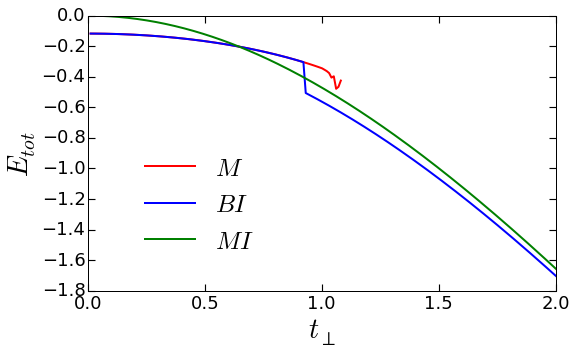

In [17]:
# Ploting Etot
fig = plt.figure(figsize=(5*golden_mean, 5))
ax = fig.add_subplot(111)

#intersect = np.argwhere(np.isclose(Em_tot_list, Ei_tot_list, atol=0.01))[0][0]
#print "tpc=", tp_list[intersect]
ax.plot(tp_list[0:108], Em_tot_list[0:108], 'r-', label="$M$",ms=6, lw=2.0) #0.6: 23 #1.6: 46
ax.plot(tp_list[0:], Eb_tot_list[0:], 'b-', label="$BI$",ms=6, lw=2.0) #0.6: 23 #1.6: 46
ax.plot(tp_list, Ei_tot_list, 'g-',label="$MI$", ms=6, lw=2.0)
#ax.plot(tp_list[intersect], Em_tot_list[intersect],'go', ms=10)
ax.legend(bbox_to_anchor=(1.05, 0.7) , loc=2, borderaxespad=0.)
ax.set_xlabel("$t_{\perp}$", size=28)
ax.set_ylabel("$E_{tot}$", size=28)
ax.set_xlim([0,2])
#ax.set_ylim([-0.1,0])

leg_prop = matplotlib.font_manager.FontProperties(size=25, family='sans-serif')
 
ax.legend(loc='lower left',
   shadow=True,frameon=False,fancybox=True,prop=leg_prop,bbox_to_anchor=[0.1,
        0.1], numpoints=1, ncol=1, handlelength=2, borderaxespad=0.0, columnspacing=0.5)

# Label properties
#ax.set_xlabel(r'$U$',fontsize=28, family='sans-serif')
#ax.set_ylabel(r'$T$',fontsize=28)

#ax.set_yticks((0.0, 0.01, 0.02, 0.03))
#ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
#ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2))
# tics
ax.tick_params(axis='both', which='both', labelsize=18, width=1.15)
ax.tick_params(axis='both', which='major', length=7.0)
ax.tick_params(axis='both', which='minor', length=3.0)

plt.tight_layout()
fig.savefig("Etot_U8.png")

Uc= 0.0


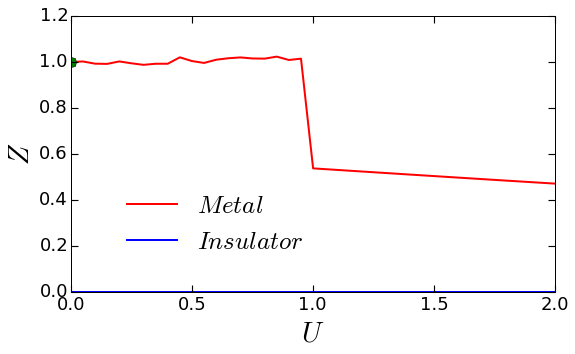

In [32]:
# Ploting Z
fig = plt.figure(figsize=(5*golden_mean, 5))
ax = fig.add_subplot(111)

intersect = np.argwhere(np.isclose(Em_tot_list, Ei_tot_list, atol=0.01))[0][0]
print "Uc=", U_list[intersect]
ax.plot(U_list[0:], Zm_list[0:], 'r-', label="$Metal$",ms=6, lw=2.0) #0.6: 46 #1.6: 23
ax.plot(U_list, Zi_list, 'b-',label="$Insulator$", ms=6, lw=2.0)
ax.plot(U_list[intersect], Zm_list[intersect],'go', ms=10)
ax.legend(bbox_to_anchor=(1.05, 0.7) , loc=2, borderaxespad=0.)
ax.set_xlabel("$U$", size=28)
ax.set_ylabel("$Z$", size=28)
ax.set_xlim([0,2])
#ax.set_ylim([-0.1,0])

leg_prop = matplotlib.font_manager.FontProperties(size=25, family='sans-serif')
 
ax.legend(loc='lower right',
   shadow=True,frameon=False,fancybox=True,prop=leg_prop,bbox_to_anchor=[0.5,
        0.1], numpoints=1, ncol=1, handlelength=2, borderaxespad=0.0, columnspacing=0.5)

# Label properties
#ax.set_xlabel(r'$U$',fontsize=28, family='sans-serif')
#ax.set_ylabel(r'$T$',fontsize=28)

#ax.set_yticks((0.0, 0.01, 0.02, 0.03))
#ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
#ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2))
# tics
ax.tick_params(axis='both', which='both', labelsize=18, width=1.15)
ax.tick_params(axis='both', which='major', length=7.0)
ax.tick_params(axis='both', which='minor', length=3.0)

plt.tight_layout()
#fig.savefig("notes/Z_tp1.8.pdf")

Uc= 0.0


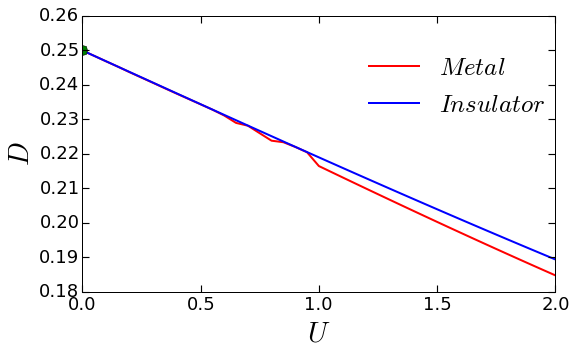

In [33]:
# Ploting D
fig = plt.figure(figsize=(5*golden_mean, 5))
ax = fig.add_subplot(111)

intersect = np.argwhere(np.isclose(Em_tot_list, Ei_tot_list, atol=0.01))[0][0]
print "Uc=", U_list[intersect]
ax.plot(U_list[0:], Dm_list[0:], 'r-', label="$Metal$",ms=6, lw=2.0) #0.6: 23 #1.6: 46
ax.plot(U_list, Di_list, 'b-',label="$Insulator$", ms=6, lw=2.0)
ax.plot(U_list[intersect], Dm_list[intersect],'go', ms=10)
ax.legend(bbox_to_anchor=(1.05, 0.7) , loc=2, borderaxespad=0.)
ax.set_xlabel("$U$", size=28)
ax.set_ylabel("$D$", size=28)
ax.set_xlim([0,2])
#ax.set_ylim([-0.1,0])

leg_prop = matplotlib.font_manager.FontProperties(size=25, family='sans-serif')
 
ax.legend(loc='lower right',
   shadow=True,frameon=False,fancybox=True,prop=leg_prop,bbox_to_anchor=[1.0,
        0.6], numpoints=1, ncol=1, handlelength=2, borderaxespad=0.0, columnspacing=0.5)

# Label properties
#ax.set_xlabel(r'$U$',fontsize=28, family='sans-serif')
#ax.set_ylabel(r'$T$',fontsize=28)

#ax.set_yticks((0.0, 0.01, 0.02, 0.03))
#ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
#ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2))
# tics
ax.tick_params(axis='both', which='both', labelsize=18, width=1.15)
ax.tick_params(axis='both', which='major', length=7.0)
ax.tick_params(axis='both', which='minor', length=3.0)

plt.tight_layout()
fig.savefig("notes/D_tp0.6.pdf")

In [44]:
#np.argwhere(np.isclose(Em_tot_list, Ei_tot_list, atol=0.008))
#U_list[np.argwhere(np.isclose(Em_tot_list, Ei_tot_list, atol=0.005))[0][0]]

In [12]:
# Ploting phase diagram
tp_list = np.arange(0,2.2,0.2)
Uc_list = [9.8, 9.4, 8.8, 8.2, 7.4, 6.6, 5.8, 5.0, 3.8, 2.4, 0]

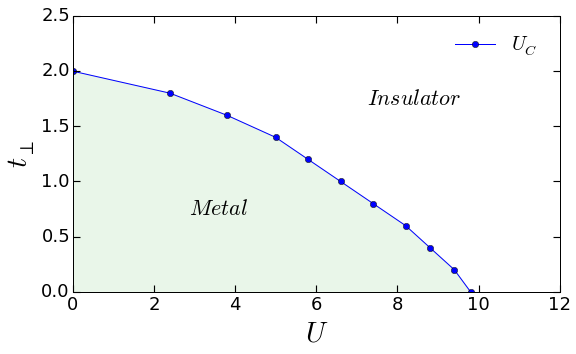

In [88]:
fig = plt.figure(figsize=(5*golden_mean, 5))
ax = fig.add_subplot(111)
ax.set_xlim([0,12])
ax.set_ylim([0,2.5])
plt.plot(Uc_list, tp_list, '-o', label="$U_{C}$")
ax.fill_between(Uc_list, tp_list, interpolate=True, color='#e9f6e9')
ax.set_xlabel(r'$U$',fontsize=28, family='sans-serif')
ax.set_ylabel(r'$t_{\perp}$',fontsize=28)
text(0.3, 0.3,'$Metal$', horizontalalignment='center',
      verticalalignment='center', transform=ax.transAxes, size=22, family='sans-serif')
text(0.7, 0.7,'$Insulator$', horizontalalignment='center',
      verticalalignment='center', transform=ax.transAxes, size=22, family='sans-serif')

# Label properties
ax.set_xlabel(r'$U$',fontsize=28, family='sans-serif')
ax.set_ylabel(r'$t_{\perp}$',fontsize=28)

#ax.set_yticks((0.0, 0.01, 0.02, 0.03))
#ax.set_xticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
#ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2))
# tics
ax.tick_params(axis='both', which='both', labelsize=18, width=1.15)
ax.tick_params(axis='both', which='major', length=7.0)
ax.tick_params(axis='both', which='minor', length=3.0)

leg_prop = matplotlib.font_manager.FontProperties(size=20, family='sans-serif')

ax.legend(loc='upper right',
    shadow=True,frameon=False,fancybox=True,prop=leg_prop,bbox_to_anchor=[0.97,
        0.96], numpoints=1, ncol=1, handlelength=2, borderaxespad=0.0, columnspacing=0.5)

plt.tight_layout()
fig.savefig("notes/PD_dimer.pdf")